In [14]:
#https://github.com/girishkuniyal/Cat-Dog-CNN-Classifier/blob/master/DogVsCat%20Classifier.ipynb
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Flatten
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import Conv2D
from tensorflow.keras.layers import MaxPooling2D
from tensorflow.keras.callbacks import TensorBoard
from tensorflow.keras.optimizers import Adam
from tensorflow import keras

In [15]:
from warnings import filterwarnings
filterwarnings('ignore')

In [16]:
from keras.optimizers import SGD, Adam
model = Sequential()
model.add(Conv2D(32, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same', input_shape=(64,64,3)))
model.add(MaxPooling2D((2, 2)))
model.add(Flatten())
model.add(Dense(128, activation='relu', kernel_initializer='he_uniform'))
model.add(Dense(1, activation='sigmoid'))
 # compile model
opt = SGD(lr=0.001, momentum=0.9)
model.compile(optimizer=opt, loss='binary_crossentropy', metrics=['accuracy'])


In [17]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator
train_datagen = ImageDataGenerator(rescale=1./255,
                                   shear_range=0.1,
                                   zoom_range=0.1,
                                   horizontal_flip=True)
test_datagen = ImageDataGenerator(rescale=1./255)

#Training Set
train_set = train_datagen.flow_from_directory('v_data/train',
                                             target_size=(64,64),
                                             batch_size=32,
                                             class_mode='binary')
#Validation Set
test_set = test_datagen.flow_from_directory('v_data/validation',
                                           target_size=(64,64),
                                           batch_size = 32,
                                           class_mode='binary',
                                           shuffle=False)
#Test Set /no output available
test_set1 = test_datagen.flow_from_directory('v_data/test',
                                            target_size=(64,64),
                                            batch_size=32,
                                            class_mode='binary',
                                            shuffle=False)

Found 360 images belonging to 2 classes.
Found 40 images belonging to 2 classes.
Found 100 images belonging to 2 classes.


In [18]:
%%capture
model.fit_generator(train_set,
                        steps_per_epoch=10, 
                        epochs = 10,
                        validation_data = test_set,
                        validation_steps = 10, 
                        #callbacks=[tensorboard]
                        );

#Some Helpful Instructions:

#finetune you network parameter in last by using low learning rate like 0.00001
#classifier.save('resources/dogcat_model_bak.h5')
#from tensorflow.keras.models import load_model
#model = load_model('partial_trained1')
#100 iteration with learning rate 0.001 and after that 0.0001

1/1 [==============================] - 0s 41ms/step


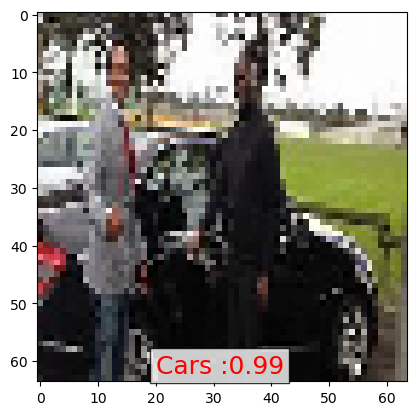

In [19]:
#Prediction of image
%matplotlib inline
import tensorflow
from tensorflow.keras.preprocessing import image
import matplotlib.pyplot as plt
import numpy as np
img1 = image.load_img('v_data/validation/cars/186.jpg', target_size=(64, 64))
img = image.img_to_array(img1)
img = img/255
# create a batch of size 1 [N,H,W,C]
img = np.expand_dims(img, axis=0)
prediction = model.predict(img, batch_size=None,steps=1) #gives all class prob.
if(prediction[:,:]>0.5):
    value ='Plain :%1.2f'%(prediction[0,0])
    plt.text(20, 62,value,color='red',fontsize=18,bbox=dict(facecolor='white',alpha=0.8))
else:
    value ='Cars :%1.2f'%(1.0-prediction[0,0])
    plt.text(20, 62,value,color='red',fontsize=18,bbox=dict(facecolor='white',alpha=0.8))

plt.imshow(img1)
plt.show()

1/1 [==============================] - 0s 24ms/step


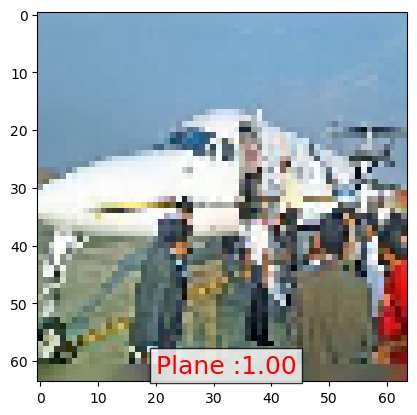

In [20]:
import tensorflow
from tensorflow.keras.preprocessing import image
import matplotlib.pyplot as plt
import numpy as np
img1 = image.load_img('v_data/test/planes/12.jpg', target_size=(64, 64))
img = image.img_to_array(img1)
img = img/255
# create a batch of size 1 [N,H,W,C]
img = np.expand_dims(img, axis=0)
prediction = model.predict(img, batch_size=None,steps=1) #gives all class prob.
if(prediction[:,:]>0.5):
    value ='Plane :%1.2f'%(prediction[0,0])
    plt.text(20, 62,value,color='red',fontsize=18,bbox=dict(facecolor='white',alpha=0.8))
else:
    value ='Cars :%1.2f'%(1.0-prediction[0,0])
    plt.text(20, 62,value,color='red',fontsize=18,bbox=dict(facecolor='white',alpha=0.8))

plt.imshow(img1)
plt.show()

In [21]:
import pandas as pd
test_set.reset
ytesthat = model.predict_generator(test_set)
df = pd.DataFrame({
    'filename':test_set.filenames,
    'predict':ytesthat[:,0],
    'y':test_set.classes
})

In [22]:
pd.set_option('display.float_format', lambda x: '%.5f' % x)
df['y_pred'] = df['predict']>0.5
df.y_pred = df.y_pred.astype(int)
df.head(40)

,filename,predict,y,y_pred
0,cars\181.jpg,0.05924,0,0
1,cars\182.jpg,0.01028,0,0
2,cars\183.jpg,0.04455,0,0
3,cars\184.jpg,0.93470,0,1
4,cars\185.jpg,0.97805,0,1
5,cars\186.jpg,0.00991,0,0
6,cars\187.jpg,0.79317,0,1
7,cars\188.jpg,0.07966,0,0
8,cars\189.jpg,0.71801,0,1
9,cars\190.jpg,0.67343,0,1


In [23]:
misclassified = df[df['y']!=df['y_pred']]
print('Total misclassified image from 40 Validation images : %d'%misclassified['y'].count())

Total misclassified image from 40 Validation images : 6


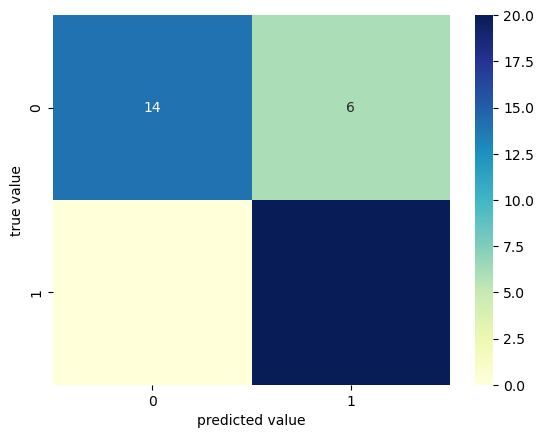

In [24]:
#Prediction of test set
from sklearn.metrics import confusion_matrix 
import matplotlib.pyplot as plt
import seaborn as sns

conf_matrix = confusion_matrix(df.y,df.y_pred)
sns.heatmap(conf_matrix,cmap="YlGnBu",annot=True,fmt='g');
plt.xlabel('predicted value')
plt.ylabel('true value');


1/1 [==============================] - 0s 16ms/step


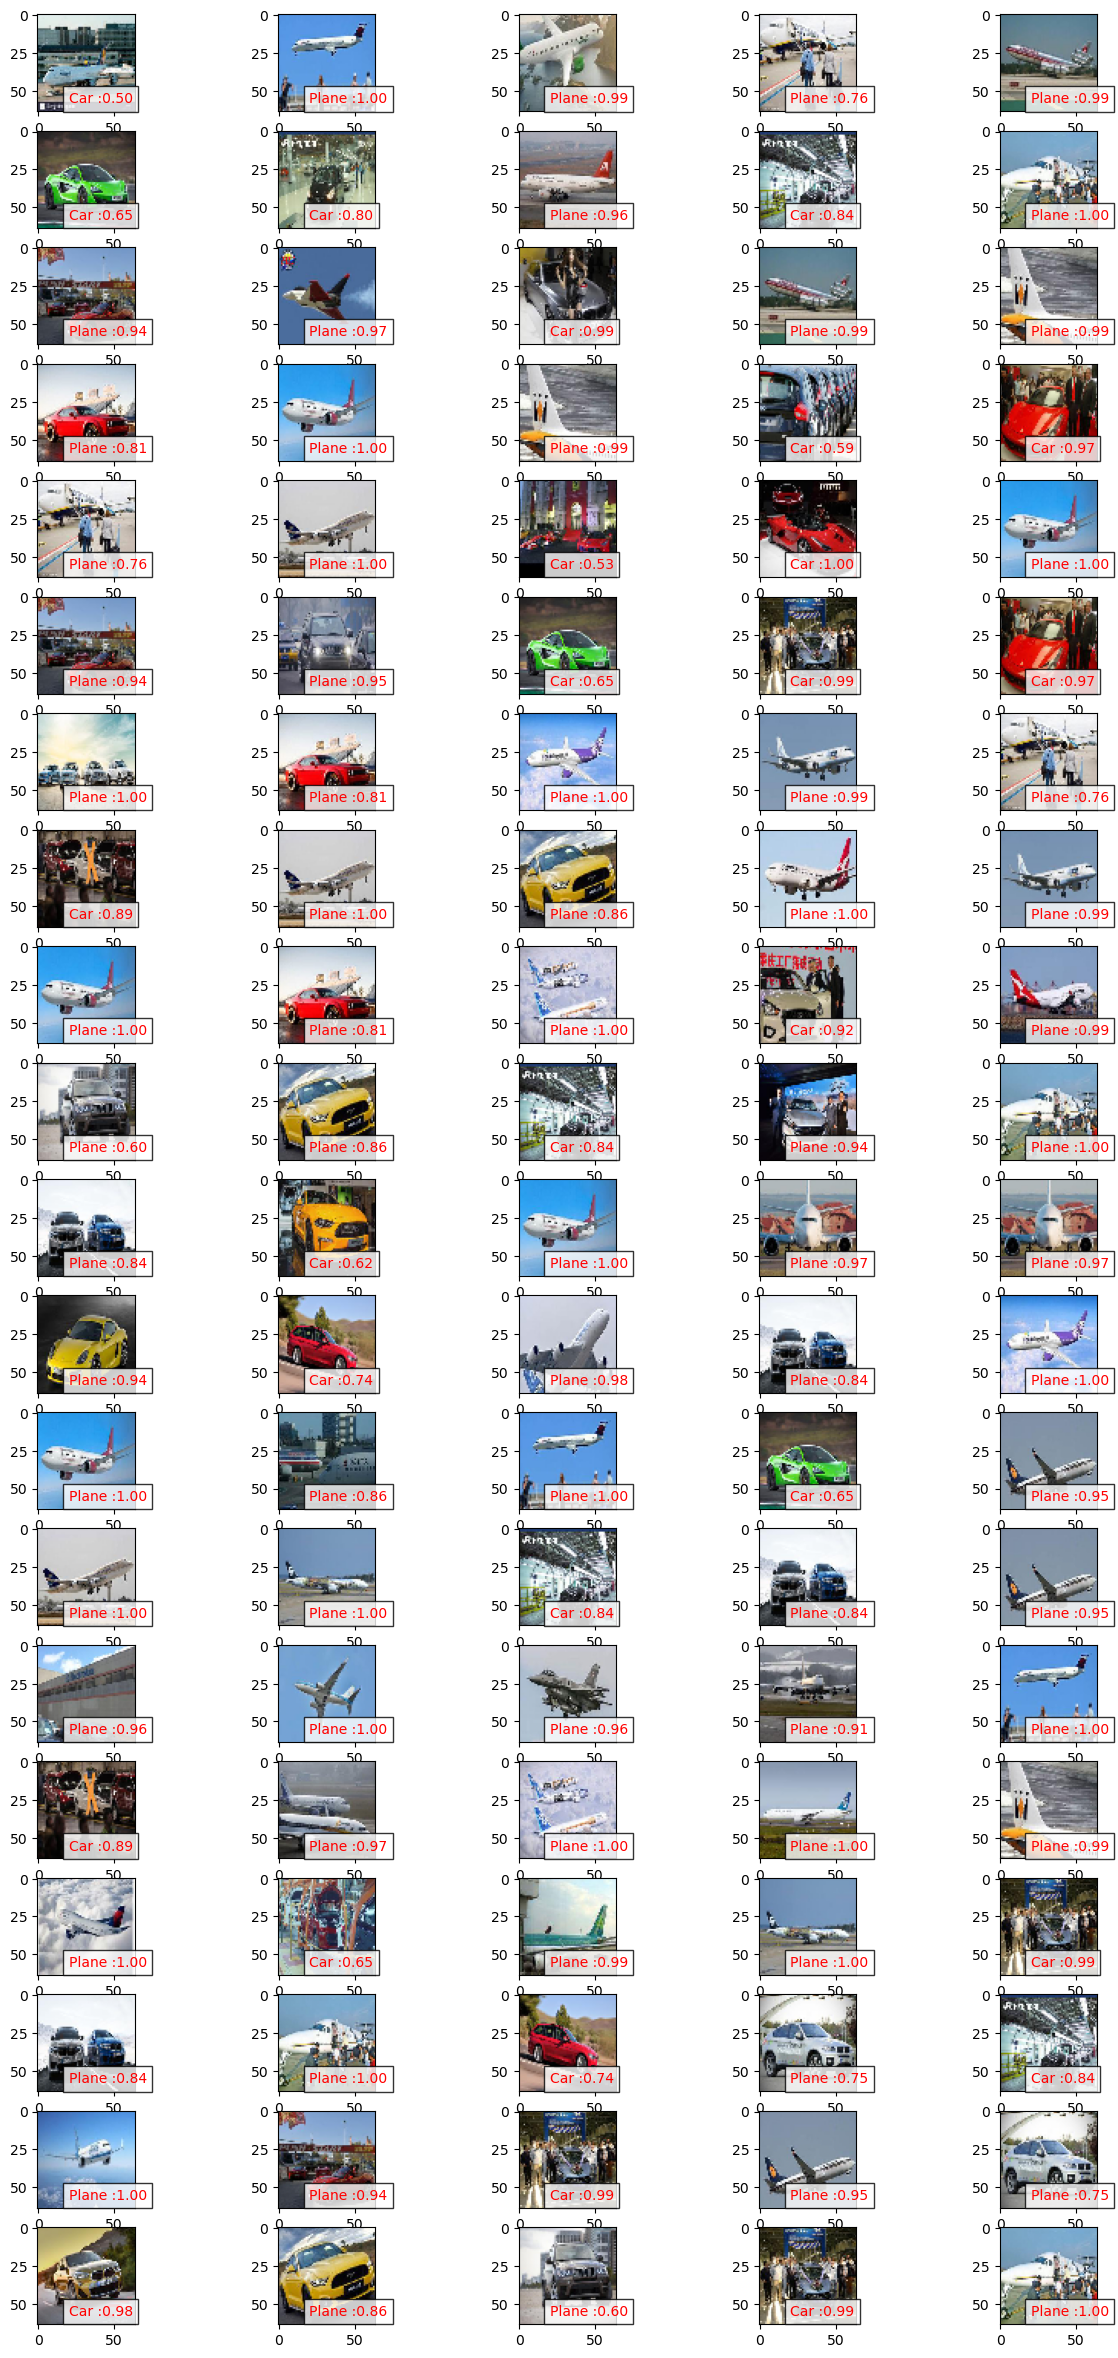

In [25]:
fig=plt.figure(figsize=(15, 30))
columns = 5
rows = 20
for i in range(columns*rows):
    fig.add_subplot(rows, columns, i+1)
    img1 = image.load_img('v_data/test/'+test_set1.filenames[np.random.choice(range(100))], target_size=(64, 64))
    img = image.img_to_array(img1)
    img = img/255
    img = np.expand_dims(img, axis=0)
    prediction = model.predict(img, batch_size=None,steps=1) #gives all class prob.
    if(prediction[:,:]>0.5):
        value ='Plane :%1.2f'%(prediction[0,0])
        plt.text(20, 58,value,color='red',fontsize=10,bbox=dict(facecolor='white',alpha=0.8))
    else:
        value ='Car :%1.2f'%(1.0-prediction[0,0])
        plt.text(20, 58,value,color='red',fontsize=10,bbox=dict(facecolor='white',alpha=0.8))
    plt.imshow(img1)

In [26]:
%%capture
# Model Accuracy
x1 = model.evaluate_generator(train_set)
x2 = model.evaluate_generator(test_set)
x3 = model.evaluate_generator(test_set1)

In [27]:
print('Training Accuracy  : %1.2f%%     Training loss  : %1.6f'%(x1[1]*100,x1[0]))
print('Validation Accuracy: %1.2f%%     Validation loss: %1.6f'%(x2[1]*100,x2[0]))
print('Test Accuracy: %1.2f%%     Test loss: %1.6f'%(x3[1]*100,x3[0]))

Training Accuracy  : 78.61%     Training loss  : 0.490132
Validation Accuracy: 85.00%     Validation loss: 0.382168
Test Accuracy: 76.00%     Test loss: 0.552680
